<a href="https://colab.research.google.com/github/VVYing/OutplayDS/blob/main/Top_Hits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Top Hits

# [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb)

Raw data: https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns  
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset-of-10s.csv to dataset-of-10s.csv


In [3]:
df10 = pd.read_csv('dataset-of-10s.csv')
df10['decade'] = 2010

In [6]:
from google.colab import files
uploaded = files.upload()

Saving dataset-of-00s.csv to dataset-of-00s (1).csv


In [7]:
df00 = pd.read_csv('dataset-of-00s.csv')
df00['decade'] = 2000

In [8]:
from google.colab import files
uploaded = files.upload()

Saving dataset-of-90s.csv to dataset-of-90s.csv


In [9]:
df90 = pd.read_csv('dataset-of-90s.csv')
df90['decade'] = 1990

In [10]:
from google.colab import files
uploaded = files.upload()

Saving dataset-of-80s.csv to dataset-of-80s.csv


In [11]:
df80 = pd.read_csv('dataset-of-80s.csv')
df80['decade'] = 1980

In [12]:
from google.colab import files
uploaded = files.upload()

Saving dataset-of-70s.csv to dataset-of-70s.csv


In [13]:
df70 = pd.read_csv('dataset-of-70s.csv')
df70['decade'] = 1970

In [14]:
from google.colab import files
uploaded = files.upload()

Saving dataset-of-60s.csv to dataset-of-60s.csv


In [15]:
df60 = pd.read_csv('dataset-of-60s.csv')
df60['decade'] = 1960

In [19]:
df = pd.concat([df60,df70,df80,df90,df00,df10])
df.shape

(41106, 20)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41106 entries, 0 to 6397
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float64

In [21]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000,1982.775264
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006,17.491234
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000,1960.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000,1970.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000,1980.000000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000,2000.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000,2010.000000


No handles with labels found to put in legend.


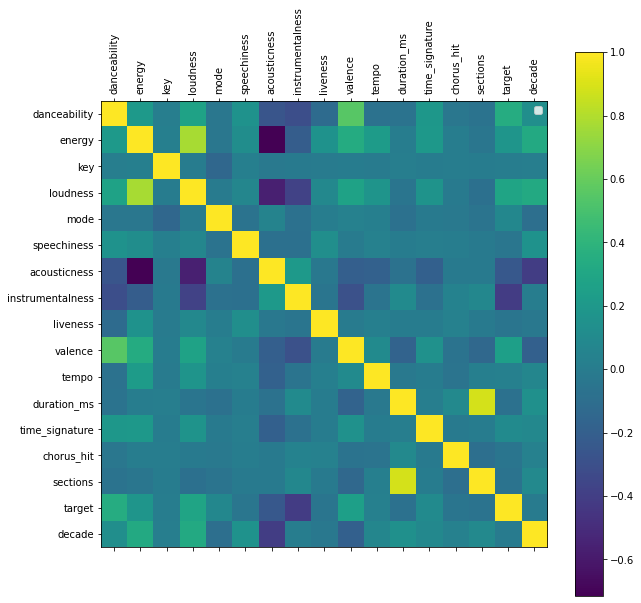

In [22]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(df)

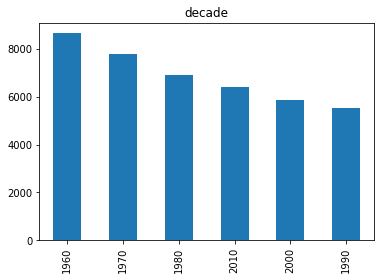

In [23]:
df['decade'].value_counts().plot(kind='bar', title="decade")
plt.show()

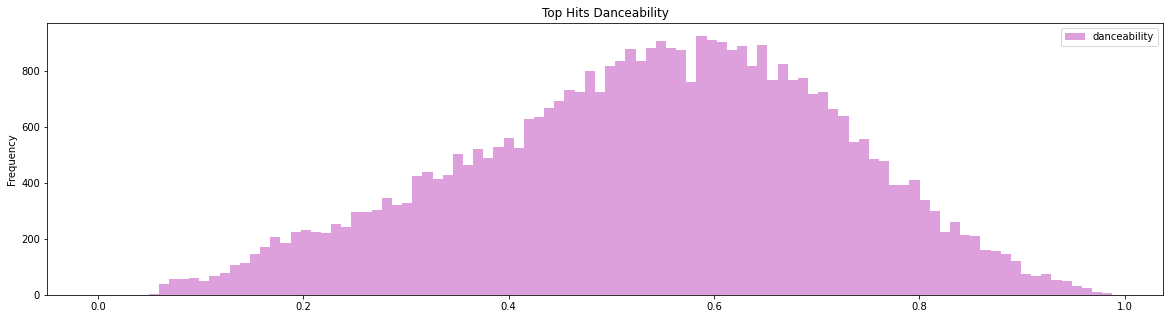

In [24]:
df.plot(kind="hist", y="danceability", bins=100, color="plum", figsize=(20, 5), title="Top Hits Danceability")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


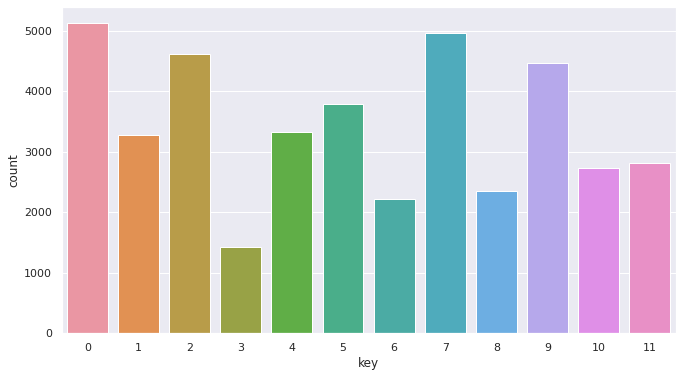

In [25]:
sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(df['key'])

In [26]:
top10_track = df10.nlargest(10, 'danceability')

fig = px.bar(top10_track, x='track', y=['energy', 'acousticness', 'liveness'], barmode='group')
fig.show()

In [27]:
df.groupby("danceability")["duration_ms"].median()

danceability
0.0000    178467.0
0.0576    760053.0
0.0588    206227.0
0.0593    458133.0
0.0596    338793.5
            ...   
0.9790    254467.0
0.9800    238060.0
0.9810    129384.0
0.9860    229669.0
0.9880    248160.0
Name: duration_ms, Length: 1048, dtype: float64

*Data Modeling*

In [28]:
df = df10
df.shape

(6398, 20)

In [29]:
X = df.drop(['energy','uri','artist','track'], axis = 1)
y = df.energy

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.7902268777972392


In [31]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression  
# Import Linear Regression model

multiple_linear_reg = LinearRegression(fit_intercept=False)  
# Create a instance for Linear Regression model

multiple_linear_reg.fit(X_train, y_train)  
# Fit data to the model

LinearRegression(fit_intercept=False)

In [33]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)  
# Create a PolynomialFeatures instance in degree 3

x_train_poly = polynomial_features.fit_transform(X_train)  
# Fit and transform the training data to polynomial

x_test_poly = polynomial_features.fit_transform(X_test)  
# Fit and transform the testing data to polynomial

polynomial_reg = LinearRegression(fit_intercept=False)  
# Create a instance for Linear Regression model

polynomial_reg.fit(x_train_poly, y_train)  
# Fit data to the model

LinearRegression(fit_intercept=False)

In [34]:
from sklearn.tree import DecisionTreeRegressor  

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  
# Create a instance for Decision Tree Regression model

decision_tree_reg.fit(X_train, y_train)  
# Fit data to the model

DecisionTreeRegressor(max_depth=5, random_state=13)

In [35]:
from sklearn.ensemble import RandomForestRegressor  

random_forest_reg = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=13)  
# Create a instance for Random Forest Regression model

random_forest_reg.fit(X_train, y_train)  
# Fit data to the model

RandomForestRegressor(max_depth=5, n_estimators=500, random_state=13)

In [36]:
from sklearn.svm import SVR 

support_vector_reg = SVR(gamma="auto", kernel="linear", C=1)  
# Create a instance for Support Vector Regression model

support_vector_reg.fit(X_train, y_train)  
# Fit data to the model

SVR(C=1, gamma='auto', kernel='linear')

In [37]:
from sklearn.model_selection import cross_val_predict   
from sklearn.metrics import r2_score   
from sklearn.metrics import mean_squared_error   
from math import sqrt  

Evaluating Multiple Linear Regression Model

In [38]:
# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  -6.863027620994893
Testing Accuracy for Multiple Linear Regression Model:  -7.02674086912403
RMSE for Training Data:  0.6764372233112996
RMSE for Testing Data:  0.6773274160452462
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.7740564548915073


Evaluating Polynomial Regression Model

In [39]:
# Prediction with training dataset:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with testing dataset:
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Find training accuracy for this model:
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy for Polynomial Regression Model: ", accuracy_PR_train)

# Find testing accuracy for this model:
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression Model: ", accuracy_PR_test)

# Find RMSE for training data:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

# Find RMSE for testing data:
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

Training Accuracy for Polynomial Regression Model:  0.8722985502037985
Testing Accuracy for Polynomial Regression Model:  0.609717730132384
RMSE for Training Data:  0.08620461398041215
RMSE for Testing Data:  0.14935454548930985
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.784463739980862


Evaluating Decision Tree Regression Model

In [40]:
# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.7738126739223966
Testing Accuracy for Decision Tree Regression Model:  0.7376098679968957
RMSE for Training Data:  0.11472728884968043
RMSE for Testing Data:  0.12246240452818181
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.7367100616342848


### Evaluating Random Forest Regression Model


In [41]:
# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.803624981508567
Testing Accuracy for Random Forest Regression Model:  0.7818358051568357
RMSE for Training Data:  0.10689951061003286
RMSE for Testing Data:  0.11166595160021339
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.7798673861038312


Evaluating Support Vector Regression Model

In [42]:
# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

# Prediction with 3-Fold Cross Validation:
y_pred_cv_SVR = cross_val_predict(support_vector_reg, X, y, cv=3)

# Find accuracy after 3-Fold Cross Validation
accuracy_cv_SVR = r2_score(y, y_pred_cv_SVR)
print("Accuracy for 10-Fold Cross Predicted Support Vector Regression Model: ", accuracy_cv_SVR)

Training Accuracy for Support Vector Regression Model:  0.7701546998084129
Testing Accuracy for Support Vector Regression Model:  0.7909198906741817
RMSE for Training Data:  0.11565127138628509
RMSE for Testing Data:  0.10931641802968661
Accuracy for 10-Fold Cross Predicted Support Vector Regression Model:  -2324098192.350679


In [43]:
# Compare all results in one table
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, accuracy_cv_SVR]

parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=5", "n_estimators=400, max_depth=5", "kernel=”linear”, C=1"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "5-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]

models = pd.DataFrame(data=table_data, index=model_names)
models

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,5-Fold Score
Multiple Linear Regression,fit_intercept=False,-6.863028,-7.026741,0.676437,0.677327,7.740565e-01
Polynomial Regression,fit_intercept=False,0.872299,0.609718,0.086205,0.149355,7.844637e-01
Decision Tree Regression,max_depth=5,0.773813,0.737610,0.114727,0.122462,7.367101e-01
Random Forest Regression,"n_estimators=400, max_depth=5",0.803625,0.781836,0.106900,0.111666,7.798674e-01
Support Vector Regression,"kernel=”linear”, C=1",0.770155,0.790920,0.115651,0.109316,-2.324098e+09
